#Titanic Dataset - Exploratory Data Analysis (EDA)
###By Shaimaa M. Abde-Aal

this project performs Exploratory Data Analysis (EDA) on the Titanic Dataset to understand the factors that influenced passenger survival.
The analysis includes data cleaning, handling missing values, visualizations, and extracting meaningful insights.





## Importing Libraries



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

###Previewing the Dataset
here we display the first few rows of the dataset to understand its structure and columns




In [6]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data cleaning
we clean dataset to handle missing values ,convert data types ,and prepare it for analysis.
1. check missinf values
2. handle missing values
3. convert data types
4. creat new feature for better analysis:
  - FamilySize=Sibsp + Parch + 1
  - New colmun (Survival_States) that converts survival values(0,1) into meaningful lables to improve readability in visualisations

In [8]:
# 1.check missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [24]:
# 2.Handle missing values
df.drop(columns= ["Embarked","Cabin"],inplace=True)
df['Age']=df['Age'].fillna(df['Age'].median())
# 3.Convert data types
df['Pclass']=df['Pclass'].astype('category')
# 4.Create FamilySize
df['FamilySize']= df['SibSp']+df['Parch']+1
# 5.Create survival_states
df['Survival_States']=df['Survived'].map({0:'No',1:'Yes'})

KeyError: "['Embarked', 'Cabin'] not found in axis"

In [25]:
df.isnull().sum()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    category
 3   Name             891 non-null    object  
 4   Sex              891 non-null    object  
 5   Age              891 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             891 non-null    float64 
 10  FamilySize       891 non-null    int64   
 11  Survival_States  891 non-null    object  
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,Survival_States
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,No


###Summary Statistics
here we generate summary statistics for numirical features to understand their distribution
```
df.describe()
```
### Key Observations from summary statistics
1. the dataset contains 891 passenger
2. the overall survival rate is approximatly 38%
3. the average passenger age is around 29 years
4. the average fare paid is approximatly 32
5. most passenger travelled alone


In [12]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.361582,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,13.019697,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [22]:
df['Sex'].unique()
df['Pclass'].unique()

[3, 1, 2]
Categories (3, int64): [1, 2, 3]

### Survival Analysis by Gender

In [16]:
survival_by_gender=df.groupby("Sex")["Survived"].mean().sort_values(ascending=False)

survival_by_gender

,Survived
Sex,
female,0.742038
male,0.188908


/tmp/ipython-input-480/937573052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=survival_by_gender_percent.index, y=survival_by_gender_percent, palette="pastel")


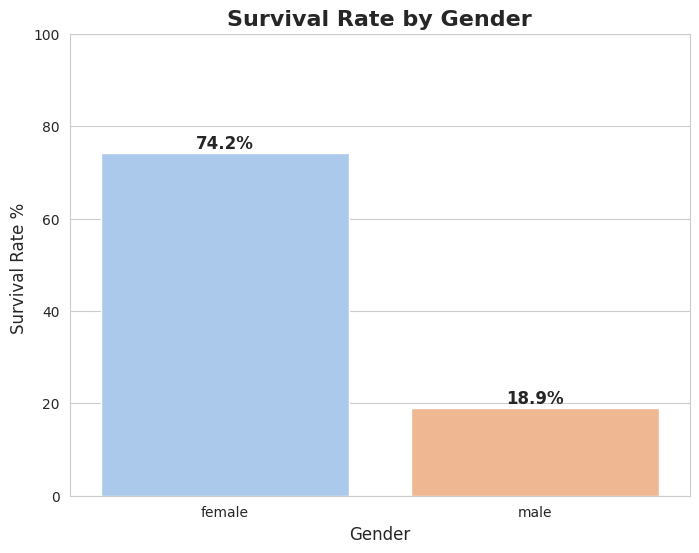

In [40]:
plt.figure(figsize=(8,6))
survival_by_gender_percent = survival_by_gender * 100
ax= sns.barplot(x=survival_by_gender_percent.index, y=survival_by_gender_percent, palette="pastel")

plt.title("Survival Rate by Gender",fontsize=16,weight='bold')
plt.xlabel("Gender",fontsize=12)
plt.ylabel("Survival Rate % ",fontsize=12)
for i,v in enumerate(survival_by_gender * 100):
  ax.text(i, v+1 , f"{v:.1f}%",ha='center',fontsize=12,weight='bold')
  plt.ylim(0,100)
plt.show()

### Insight:
Females had a significantly higher survival rate compared to males.
this suggests that gender was a strong factor influencing survival

## Survival Analysis by Passenger Class

In [39]:
survival_by_class=df.groupby("Pclass")["Survived"].mean().sort_values(ascending=False)

survival_by_class

/tmp/ipython-input-480/2880225609.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class=df.groupby("Pclass")["Survived"].mean().sort_values(ascending=False)


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


/tmp/ipython-input-480/2588595414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=survival_by_class_percent.index, y=survival_by_class_percent, palette="pastel")


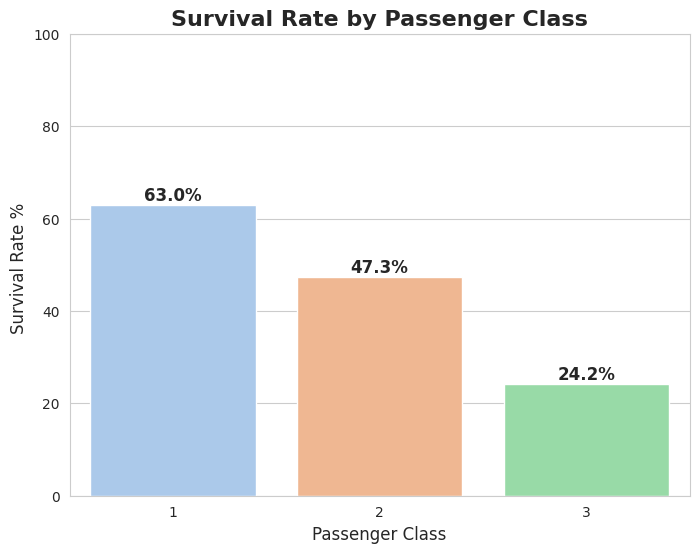

In [46]:
plt.figure(figsize=(8,6))
survival_by_class_percent = survival_by_class * 100
ax= sns.barplot(x=survival_by_class_percent.index, y=survival_by_class_percent, palette="pastel")

plt.title("Survival Rate by Passenger Class",fontsize=16,weight='bold')
plt.xlabel("Passenger Class",fontsize=12)
plt.ylabel("Survival Rate % ",fontsize=12)
for i,v in enumerate(survival_by_class_percent):
  ax.text(i, v+1 , f"{v:.1f}%",ha='center',fontsize=12,weight='bold')
  plt.ylim(0,100)
plt.show()

### Insight:
Passengersin higher classes had a  significantly higher survival rate
this suggests that passenger class was a strong factor influencing survival

##Survival Analysis by Age


In [48]:
age_bins=[0,12,18,35,60,80]
age_lables=['Child','Tenn','Young Adult','Adult','Senior']
df['Age_Group']=pd.cut(df['Age'],bins=age_bins,labels=age_lables)
survival_by_age=df.groupby("Age_Group")["Survived"].mean().sort_values(ascending=False)

survival_by_age

/tmp/ipython-input-480/1238191977.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age=df.groupby("Age_Group")["Survived"].mean().sort_values(ascending=False)


,Survived
Age_Group,
Child,0.579710
Tenn,0.428571
Adult,0.400000
Young Adult,0.353271
Senior,0.227273


/tmp/ipython-input-480/1041786608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=survival_by_age.index, y=survival_by_age.values, palette="pastel")


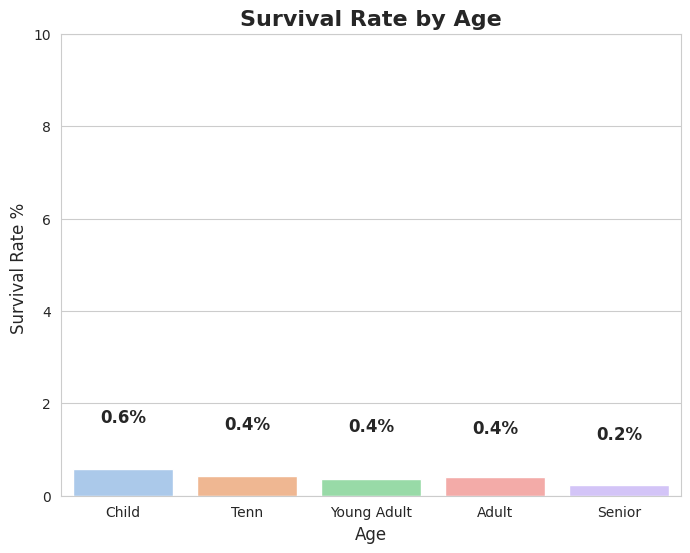

In [52]:
plt.figure(figsize=(8,6))
ax= sns.barplot(x=survival_by_age.index, y=survival_by_age.values, palette="pastel")

plt.title("Survival Rate by Age",fontsize=16,weight='bold')
plt.xlabel("Age",fontsize=12)
plt.ylabel("Survival Rate % ",fontsize=12)
for i,v in enumerate(survival_by_age.values):
  ax.text(i, v+1 , f"{v:.1f}%",ha='center',fontsize=12,weight='bold')
  plt.ylim(0,10)
plt.show()

## Survival Analysis by Family Size

In [56]:
survival_by_familysize=df.groupby('FamilySize')['Survived'].mean() * 100

survival_by_familysize

,Survived
FamilySize,
1,30.353818
2,55.279503
3,57.843137
4,72.413793
5,20.000000
6,13.636364
7,33.333333
8,0.000000
11,0.000000


/tmp/ipython-input-480/3102031712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=survival_by_familysize.index, y=survival_by_familysize.values, palette="pastel")


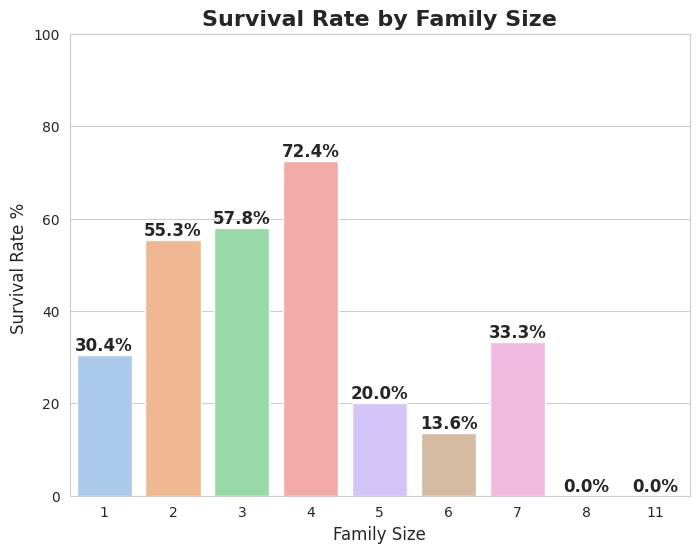

In [58]:
plt.figure(figsize=(8,6))
ax= sns.barplot(x=survival_by_familysize.index, y=survival_by_familysize.values, palette="pastel")

plt.title("Survival Rate by Family Size",fontsize=16,weight='bold')
plt.xlabel("Family Size",fontsize=12)
plt.ylabel("Survival Rate % ",fontsize=12)
for i,v in enumerate(survival_by_familysize.values):
  ax.text(i, v+1 , f"{v:.1f}%",ha='center',fontsize=12,weight='bold')
  plt.ylim(0,100)
plt.show()

### Insight:

Passengers with small families (2-4 members) had the highest survival rate.
Passengers who were alone (FamilySize=1) or in very large families had lower survival rates.
This suggests that moderate family size was beneficial for survival.

## Correlation Analysis & Heatmap

In [59]:
# correlation
numeric_cols=['Survived','Pclass','SibSp','Parch','Age','Fare','FamilySize']
corr_matrix= df[numeric_cols].corr()

corr_matrix

,Survived,Pclass,SibSp,Parch,Age,Fare,FamilySize
Survived,1.000000,-0.338481,-0.035322,0.081629,-0.064910,0.257307,0.016639
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.339898,-0.549500,0.065997
SibSp,-0.035322,0.083081,1.000000,0.414838,-0.233296,0.159651,0.890712
Parch,0.081629,0.018443,0.414838,1.000000,-0.172482,0.216225,0.783111
Age,-0.064910,-0.339898,-0.233296,-0.172482,1.000000,0.096688,-0.245619
Fare,0.257307,-0.549500,0.159651,0.216225,0.096688,1.000000,0.217138
FamilySize,0.016639,0.065997,0.890712,0.783111,-0.245619,0.217138,1.000000


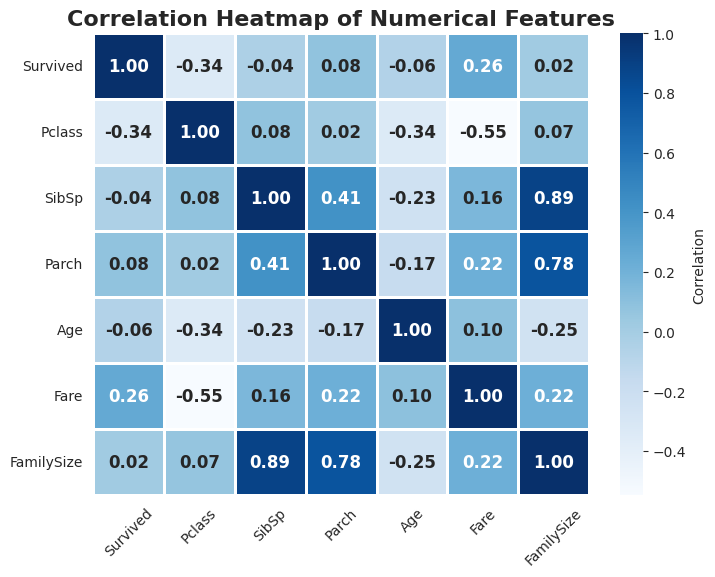

In [62]:
#Heatmap
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    linewidths=0.8,
    linecolor='white',
    cbar_kws={'label': 'Correlation'},
    annot_kws={"size":12, "weight":"bold"}
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16, weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()